# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [32]:
import pandas as pd
import numpy as np

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

In [124]:
# Log transform and normalize
df_con = pd.DataFrame()
for col in continuous:
    ds_l = np.log(ames[col])
    ds_sc = (ds_l-np.mean(ds_l))/np.std(ds_l)
    df_con[col+'_scaled'] = ds_sc

df_con.rename(columns={'1stFlrSF_scaled':'FirstFlrSF_scaled'}, inplace=True)
df_con.head()

,LotArea_scaled,FirstFlrSF_scaled,GrLivArea_scaled,SalePrice_scaled
0,-0.133231,-0.803570,0.529260,0.560068
1,0.113442,0.418585,-0.381846,0.212764
2,0.420061,-0.576560,0.659675,0.734046
3,0.103347,-0.439287,0.541511,-0.437382
4,0.878409,0.112267,1.282191,1.014651


## Categorical Features

In [125]:
# One hot encode categoricals
categoricals_pref = ['BType', 'KQual', 'SType', 'MSZ', 'Str', 'Neigh']
df_cat = pd.get_dummies(ames[categoricals], prefix=categoricals_pref, drop_first=True)
df_cat.head()

,BType_2fmCon,BType_Duplex,BType_Twnhs,BType_TwnhsE,KQual_Fa,KQual_Gd,KQual_TA,SType_CWD,SType_Con,SType_ConLD,...,Neigh_NoRidge,Neigh_NridgHt,Neigh_OldTown,Neigh_SWISU,Neigh_Sawyer,Neigh_SawyerW,Neigh_Somerst,Neigh_StoneBr,Neigh_Timber,Neigh_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [126]:
# combine features into a single dataframe called preprocessed
ames_preprocessed = pd.concat([df_con, df_cat], axis=1)
ames_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotArea_scaled     1460 non-null   float64
 1   FirstFlrSF_scaled  1460 non-null   float64
 2   GrLivArea_scaled   1460 non-null   float64
 3   SalePrice_scaled   1460 non-null   float64
 4   BType_2fmCon       1460 non-null   uint8  
 5   BType_Duplex       1460 non-null   uint8  
 6   BType_Twnhs        1460 non-null   uint8  
 7   BType_TwnhsE       1460 non-null   uint8  
 8   KQual_Fa           1460 non-null   uint8  
 9   KQual_Gd           1460 non-null   uint8  
 10  KQual_TA           1460 non-null   uint8  
 11  SType_CWD          1460 non-null   uint8  
 12  SType_Con          1460 non-null   uint8  
 13  SType_ConLD        1460 non-null   uint8  
 14  SType_ConLI        1460 non-null   uint8  
 15  SType_ConLw        1460 non-null   uint8  
 16  SType_New          1460 

## Run a linear model with SalePrice as the target variable in statsmodels

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [128]:
# Your code here
outcome = 'SalePrice_scaled'
predictors = ames_preprocessed.drop([outcome], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=ames_preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalePrice_scaled   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:49:57   Log-Likelihood:                -738.64
No. Observations:                1460   AIC:                             1573.
Df Residuals:                    1412   BIC:                             1827.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1317      0.263     -0.500      0.617      -0.648       0.385
LotArea_scaled        0.1033      0.019      5.475      0.000       0.066       0.140
FirstFlrSF_scaled     0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea_scaled      0.3768      0.016     24.114      0.000       0.346       0.407
BType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BType_Duplex         -0.4205      0.062     -6.813      0.000      -0.542      -0.299
BType_Twnhs          -0.1404      0.093     -1.513      0.130      -0.322       0.042
BType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KQual_Fa             -1.0002      0.088    -11.315      0.000      -1.174      -0.827
KQual_Gd             -0.3822      0.050     -7.613      0.000      -0.481      -0.284
KQual_TA             -0.6695      0.055    -12.111      0.000      -0.778      -0.561
SType_CWD             0.2286      0.215      1.061      0.289      -0.194       0.651
SType_Con             0.5863      0.304      1.927      0.054      -0.010       1.183
SType_ConLD           0.3152      0.155      2.029      0.043       0.010       0.620
SType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SType_New             0.3000      0.079      3.803      0.000       0.145       0.455
SType_Oth             0.1179      0.246      0.480      0.631      -0.364       0.599
SType_WD              0.1749      0.065      2.676      0.008       0.047       0.303
MSZ_FV                1.0670      0.193      5.526      0.000       0.688       1.446
MSZ_RH                0.8771      0.194      4.512      0.000       0.496       1.258
MSZ_RL                0.9964      0.162      6.151      0.000       0.679       1.314
MSZ_RM                1.1027      0.152      7.264      0.000       0.805       1.400
Str_Pave             -0.2132      0.180     -1.182      0.237      -0.567       0.141
Neigh_Blueste         0.0530      0.318      0.167      0.868      -0.571       0.677
Neigh_BrDale         -0.4629      0.171     -2.711      0.007      -0.798      -0.128
Neigh_BrkSide        -0.6500      0.137     -4.735      0.000      -0.919      -0.381
Neigh_ClearCr        -0.2103      0.144     -1.456      0.146      -0.494       0.073
Neigh_CollgCr        -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neigh_Crawfor        -0.0824      0.129     -0.638      0.523      -0.336       0.171
Neigh_Edwards        -0.7615      0.124     -6.143      0.000      -1.005      -0.518
Neigh_Gilbert        -0.0980      0.126     -0.777      0.437      -0.346       0.150
Neigh_IDOTRR         -0.9622      0.160     -6.014      0.000      -1.276

## Run the same model in scikit-learn

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
y = ames_preprocessed['SalePrice_scaled']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
print('Coefficients: ', linreg.coef_)
print('Intercept: ', linreg.intercept_)

Coefficients:  [ 0.10327192  0.1371289   0.37682133 -0.17152105 -0.42048287 -0.14038921
 -0.05121949 -1.00020261 -0.38215288 -0.6694784   0.22855565  0.58627941
  0.31521364  0.03310544  0.01609215  0.29995612  0.1178827   0.17486316
  1.06700108  0.8771105   0.99643261  1.10266268 -0.21318409  0.0529509
 -0.46287108 -0.65004527 -0.21026441 -0.0761186  -0.08236455 -0.76152767
 -0.09803299 -0.96216285 -0.6920628  -0.25540919 -0.4408245  -0.01595592
 -0.26772132  0.36325607  0.36272091 -0.93537011 -0.70000301 -0.47559431
 -0.23317719  0.09506225  0.42971796  0.00569435  0.12766986]
Intercept:  -0.1317424941874434


## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [132]:
intercept = linreg.intercept_
coefficients = linreg.coef_
predictor_names = ames_preprocessed.drop('SalePrice_scaled', axis=1).columns
dic_coeff = {predictor_names[i]: coefficients[i] for i in range(len(predictor_names))}
dic_coeff.keys()

dict_keys(['LotArea_scaled', 'FirstFlrSF_scaled', 'GrLivArea_scaled', 'BType_2fmCon', 'BType_Duplex', 'BType_Twnhs', 'BType_TwnhsE', 'KQual_Fa', 'KQual_Gd', 'KQual_TA', 'SType_CWD', 'SType_Con', 'SType_ConLD', 'SType_ConLI', 'SType_ConLw', 'SType_New', 'SType_Oth', 'SType_WD', 'MSZ_FV', 'MSZ_RH', 'MSZ_RL', 'MSZ_RM', 'Str_Pave', 'Neigh_Blueste', 'Neigh_BrDale', 'Neigh_BrkSide', 'Neigh_ClearCr', 'Neigh_CollgCr', 'Neigh_Crawfor', 'Neigh_Edwards', 'Neigh_Gilbert', 'Neigh_IDOTRR', 'Neigh_MeadowV', 'Neigh_Mitchel', 'Neigh_NAmes', 'Neigh_NPkVill', 'Neigh_NWAmes', 'Neigh_NoRidge', 'Neigh_NridgHt', 'Neigh_OldTown', 'Neigh_SWISU', 'Neigh_Sawyer', 'Neigh_SawyerW', 'Neigh_Somerst', 'Neigh_StoneBr', 'Neigh_Timber', 'Neigh_Veenker'])

In [ ]:
define normalize(value, sample):
    

In [133]:
m_LotArea = dic_coeff['LotArea_scaled']
m_1stFlrSF = dic_coeff['FirstFlrSF_scaled']
m_BldgType_1Fam = 1 - dic_coeff['BType_2fmCon'] - dic_coeff['BType_Duplex'] - dic_coeff['BType_Twnhs'] - dic_coeff['BType_TwnhsE']
m_KitchenQual_Gd = dic_coeff['KQual_Gd']
m_SaleType_New = dic_coeff['SType_New']
m_MSZoning_RL = dic_coeff['MSZ_RL']
m_Street_Pave = dic_coeff['Str_Pave']
m_Neighborhood_NridgHt = dic_coeff['Neigh_NridgHt']

In [155]:
def log_normalize(value, sample):
    value_log = np.log(value)
    sample_log = np.log(sample)
    return (value_log - np.mean(sample_log)) / np.std(sample_log)

LotArea_value = 14977
FirstFlrSF_value = 1976
GrLivArea_value = 1976

LotArea_value_scaled = log_normalize(LotArea_value, ames['LotArea'])
FirstFlrSF_value_scaled = log_normalize(FirstFlrSF_value, ames['1stFlrSF'])
GrLivArea_value_scaled = log_normalize(GrLivArea_value, ames['GrLivArea'])

In [156]:
predictedSalePrice_scaled  = intercept + m_LotArea*LotArea_value_scaled + m_1stFlrSF*FirstFlrSF_value_scaled \
                        + m_GrLivArea*GrLivArea_value_scaled + m_BldgType_1Fam + m_KitchenQual_Gd \
                        + m_SaleType_New + m_MSZoning_RL + m_Street_Pave + m_Neighborhood_NridgHt 
print('Predicted Sale Price Scaled: ', predictedSalePrice_scaled)

Predicted Sale Price Scaled:  3.4299627839749203


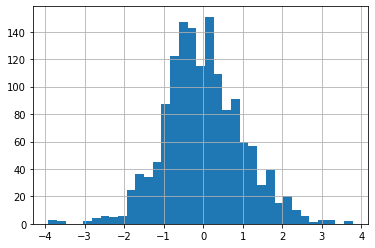

In [157]:
ames_preprocessed['SalePrice_scaled'].hist(bins='auto')

In [170]:
mean_salePrice_log = np.mean(np.log(ames['SalePrice']))
std_salePrice_log = np.std(np.log(ames['SalePrice']))
print(mean_salePrice_log)
print(std_salePrice_log)
predicted_SalePrice = np.exp(predictedSalePrice_scaled*std_salePrice_log + mean_salePrice_log)
print('Predicted Sale Price: ', predicted_SalePrice)

12.024050901109383
0.39931504624370256
Predicted Sale Price:  655849.5183198121


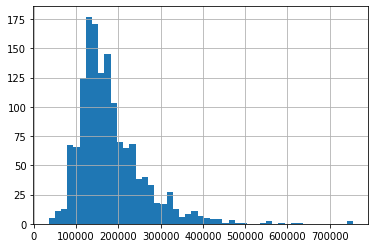

In [171]:
ames['SalePrice'].hist(bins='auto')

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!